# Wind Profiles

Notebook for learning about wind profiles for potential use in FEO wind project.

## Imports

In [1]:
# Assume we're running from project root
%cd .. 

/Users/calvinnesbitt/Documents/feo/energy_modelling/wind-to-energy


In [2]:
# Local imports
# from src.foo import bar

# Other imports
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

## Landberg Chapter 4

Roughness of the surface has a significant impact on the wind speed at a given height.

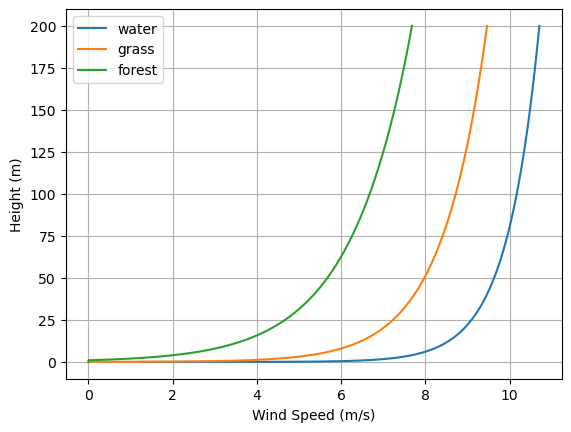

In [52]:
# Exercise 4.2

def log_wind_profile(height, roughness, friction_velocity):
    vk_const=0.4
    profile = (friction_velocity/vk_const * np.log(height/roughness))
    if np.min(profile)<0:
        return profile.clip(0) # Can't have negative speed
    else:
        return profile

bd_height = np.linspace(0.001, 200, 10000)


plt.plot(log_wind_profile(bd_height, roughness=0.0002, friction_velocity=0.31), bd_height, label='water')
plt.plot(log_wind_profile(bd_height, roughness=0.03, friction_velocity=0.43), bd_height, label='grass')
plt.plot(log_wind_profile(bd_height, roughness=1, friction_velocity=0.58), bd_height, label='forest')
plt.ylabel('Height (m)')
plt.xlabel('Wind Speed (m/s)')
# plt.yscale('log')
plt.legend()
plt.grid()

Inverting the above, you can determine roughness and friction velocity from measurements.

In [53]:
from scipy.optimize import curve_fit

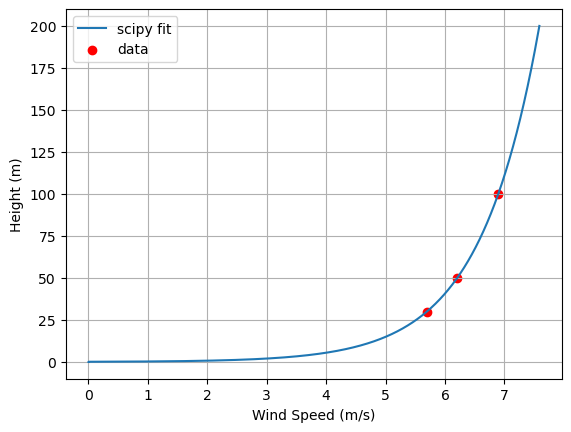

In [55]:
# Measurments
heights = [30, 50, 100]
speeds = [5.7, 6.2, 6.9]

estimated_roughness, estimated_friction_velocity = curve_fit(log_wind_profile, heights, speeds)[0]

plt.plot(log_wind_profile(bd_height, roughness=estimated_roughness, friction_velocity=estimated_friction_velocity), bd_height, label='scipy fit')
plt.scatter(speeds, heights, c='r', label='data')
plt.ylabel('Height (m)')
plt.xlabel('Wind Speed (m/s)')
# plt.yscale('log')
plt.legend()
plt.grid()

#### Leipzig Profile

In [59]:
import pandas as pd

<AxesSubplot: xlabel='speed'>

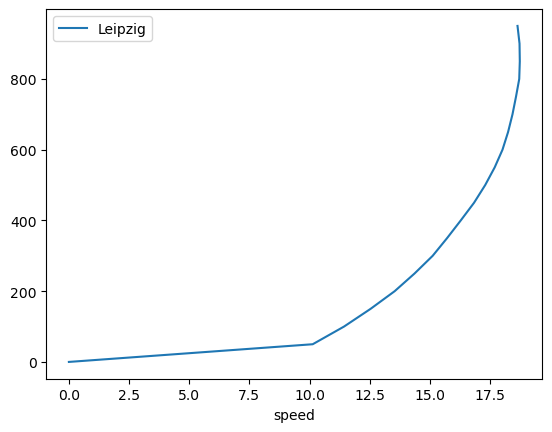

In [66]:
leipzig_profile =pd.read_csv('https://larslandberg.dk/windbook/windbook/data_files/leipzig.dat.txt', sep='\t', header=1)
leipzig_profile['speed'] = np.sqrt(leipzig_profile.vx**2 + leipzig_profile.vy**2)
leipzig_profile.plot(x='speed', y='h', label='Leipzig')